In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df1=pd.read_csv("/content/tata.csv")
df2=pd.read_csv("/content/tvs.csv")

print(df1.head(3))
print(df2.head(3))

    Month  Open Price  High Price  Low Price  Close Price  No.of Shares  \
0  Jan-14       378.1       389.0     344.00       349.85      11678580   
1  Feb-14       348.0       418.0     331.05       417.05      14744041   
2  Mar-14       413.6       420.3     379.15       398.35       8716294   

   No. of Trades  Total Turnover (Rs.)  Deliverable Quantity  \
0         199507            4304450090               5222989   
1         241898            5549984903               5497305   
2         159534            3465142223               2551230   

   % Deli. Qty to Traded Qty  Spread High-Low  Spread Close-Open  
0                      44.72            45.00             -28.25  
1                      37.28            86.95              69.05  
2                      29.27            41.15             -15.25  
    Month  Open Price  High Price  Low Price  Close Price  No.of Shares  \
0  Jan-14       76.25       82.35      64.10         77.5      10432751   
1  Feb-14       78.50   

In [ ]:
print("TATA MOTORS")
print()
print("Mean:", np.mean(df1['Close Price']))
print("Standard deviation:", np.std(df1['Close Price']))

TATA MOTORS

Mean: 371.98125
Standard deviation: 150.70365720270638


In [ ]:
print("TVS MOTORS")
print()
print("Mean:", np.mean(df2['Close Price']))
print("Standard deviation:", np.std(df2['Close Price']))

TVS MOTORS

Mean: 563.9429166666666
Standard deviation: 358.79998219155436


In [ ]:
print("Corrrelation coefficient between closing prices of TATA Motors and TVS Motors:\n", np.corrcoef(df1['Close Price'], df2['Close Price']))

Corrrelation coefficient between closing prices of TATA Motors and TVS Motors:
 [[1.        0.3899394]
 [0.3899394 1.       ]]


In [ ]:
col1=df1['Close Price']
col2=df2['Close Price']
col11=df1['Month']
col22=df2['Month']

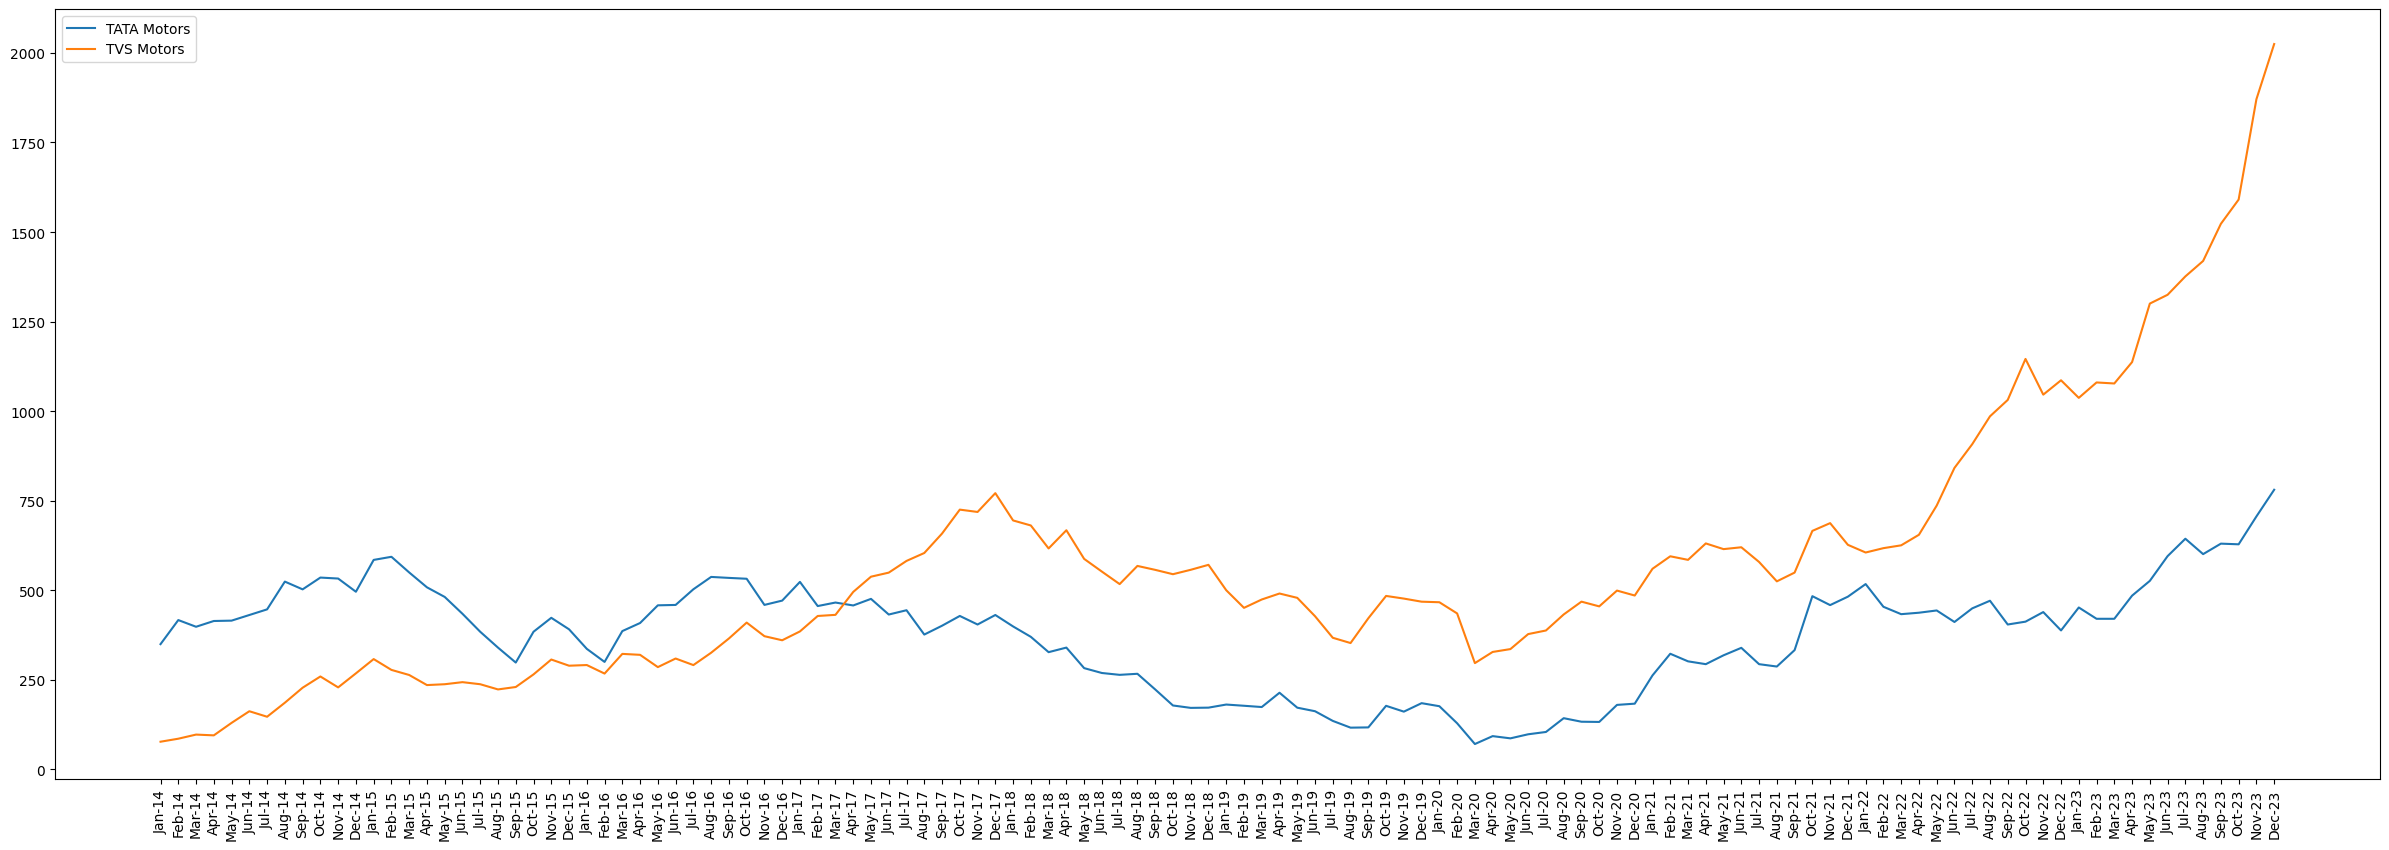

In [ ]:
plt.figure(figsize=(30,10))
plt.plot(col11, col1, label="TATA Motors")
plt.plot(col22, col2, label="TVS Motors")
plt.xticks(rotation = 90)
plt.legend()
plt.show()

In [ ]:
tata_close=df1['Close Price']
tata_open=df1['Open Price']
tvs_close=df2['Close Price']
tvs_open=df2['Open Price']
tata_var=np.var(tata_close)
tvs_var=np.var(tvs_close)
cc=np.corrcoef(tata_close, tvs_close)

In [ ]:
def calculate_rr(open, close):
    rr=[]
    for i in range(len(open)):
        r=(close[i]-open[i])/open[i]
        rr.append(r)
    return rr

In [ ]:
def calculate_er(rr):
    return np.mean(rr)

In [ ]:
def calculate_var(rr, mean):
    var=[]
    for i in range(len(rr)):
        v=(rr[i]-mean)**2
        var.append(v)
    return np.mean(var)

In [ ]:
def corr_coef(col1, col2, er1, er2):
    cc=[]
    col12=[]
    col22=[]
    n=len(col1)
    for i in range(n):
        cc.append((col1[i]-er1)*(col2[i]-er2))
        col12.append((col1[i]-er1)**2)
        col22.append((col2[i]-er2)**2)
    num=sum(cc)
    den=((sum(col12)*sum(col22))**0.5)
    return (num/den)

In [ ]:
tata_rr=calculate_rr(tata_open, tata_close)
tvs_rr=calculate_rr(tvs_open, tvs_close)
tata_er=calculate_er(tata_rr)
tvs_er=calculate_er(tvs_rr)
tata_var=calculate_var(tata_rr, tata_er)
tvs_var=calculate_var(tvs_rr, tvs_er)
cc=corr_coef(tata_rr, tvs_rr, tata_er, tvs_er)

In [ ]:
print(tata_er, "\t", tata_var)
print(tvs_er, "\t", tvs_var)
print(cc)

0.012496618759035062 	 0.02021703567623685
0.029633306825927866 	 0.009930077783364888
0.5035641127741726


In [ ]:
def calculate_w_mvp(sigma1, sigma2, rho12):
    num=sigma2**2-rho12*sigma1*sigma2
    den=sigma1**2+sigma2**2-2*rho12*sigma1*sigma2
    return (num/den)

In [ ]:
def muv(w, mu1, mu2):
    muv=w*mu1+(1-w)*mu2
    return muv

In [ ]:
def sigmav(w, sigma1, sigma2, cc):
    sigmav=w**2*sigma1**2+(1-w)**2*sigma2**2+2*w*(1-w)*sigma1*sigma2*cc
    return sigmav

In [ ]:
w=calculate_w_mvp(tata_var, tvs_var, cc)
print(w)
expected_return=muv(w, tata_er, tvs_er)
print(expected_return)
minimum_risk=sigmav(w, tata_var, tvs_var, cc)
print(minimum_risk)

-0.008151617553404867
0.029772998553181173
9.858616809742515e-05
